### Examples of computer vision problems:<br>
* Binary classification: "Is this steak or pizza?"
* Multiclass classification: "Is thisSteak, shushi, or pizza?"
* Object detection: "Where's the thing we're looking for?"
* Segmentation: "What are the different sections in this image?"

### What is a Convolutional Neural Network?


## 0. Computer vision libraries in PyTorch
* 'torchvision.datasets' - get datasets and data loading functions for computer vision'
* 'torchvision.models' - get pretrained computer vision models
* torchvision.transforms - function for manipulating your vision data (images) to be suitable for use with an ML model
* torch.utils.data.Dataset - Base dataset class for Pytorch
* Torch.utils.data.Dataloader - Creates a python iterable over a dataset
*


In [2]:
from sympy.printing.pytorch import torch
# Import PyTorch
import torchvision
from torch import nn

# Import torchvision
import torchvision
from torch.nn.modules.module import T
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.7.1
0.22.1


## 1. Getting a dataset
The data set being using FashionMNIST from torchvision.datasets


In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False, # we want test data not training
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Check the shape of the image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Label shape: {class_names[label]}")


Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label shape: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

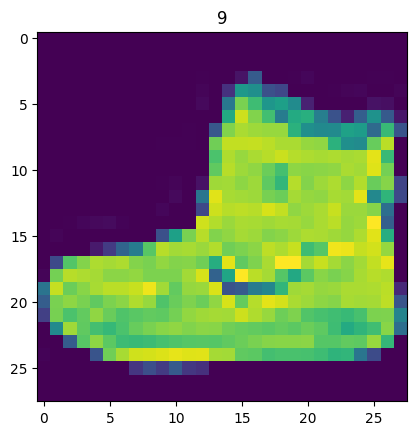

In [9]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

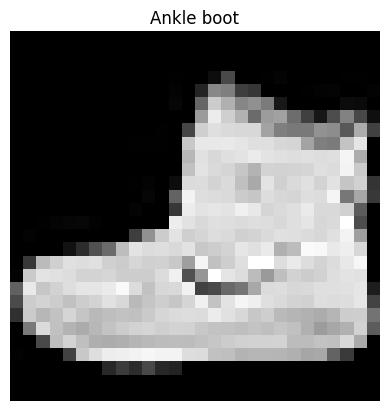

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

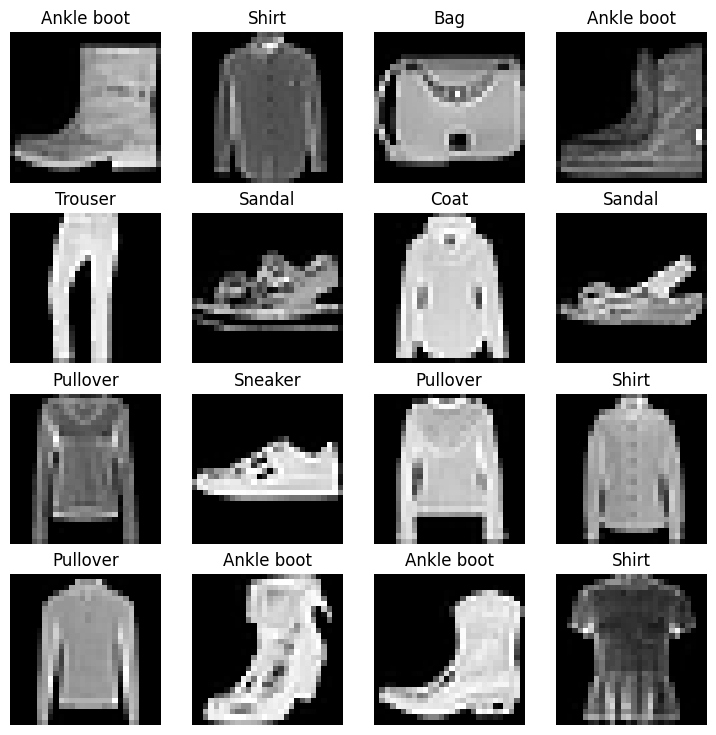

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)



Can this be done the linear lines?

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.
<br>DataLoader turns our data into a PyTorch iterable
<br>More specifically into batches (or minibatches)
<br> Why do so?
<br>1. It is more computationally efficient, as in, your computing hardware may not be able to look or store in memory at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
<br>2. It gives our neural network more chances to update its gradient per epoch.


In [12]:
from torch.utils.data import DataLoader

# Set up the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1221da300>,
 <torch.utils.data.dataloader.DataLoader at 0x1228c2840>)

In [13]:
# Let's check out what we've created
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}... ")

length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32... 


In [14]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


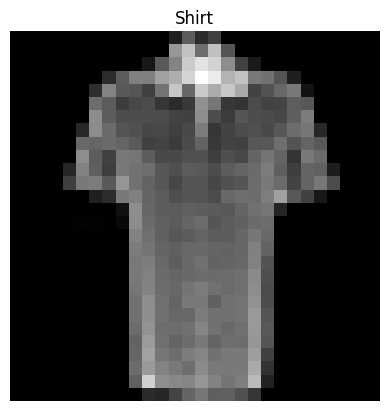

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modeling experiences, its a best practice to start with a baseline model.
<br><br>
A baseline model is a simple model you will try and improve upon with later models/experiments.
<br> In  other words: start simple and add complexity when necessary

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# find out what happened
print(f"Shape before flatten_model: {train_features_batch[0].shape}")
print(f"Shape after flatten_model: {output.shape}")

Shape before flatten_model: torch.Size([1, 28, 28])
Shape after flatten_model: torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)



In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # = 28 * 28
    hidden_units=10,
    output_shape=len(class_names) # One for every class
)
model_0.to(torch.device('cpu'))

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer, and evaluation method
* Loss Function - nn.CrossEntrpyLoss()
* Optimizer - torch.optim.SGD()
*

In [20]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("Helper functions already exists")
else:
    print("Helper functions downloading")
    request = requests.get("https://raw.githubusercontent.com/mrbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)



Helper functions already exists


In [21]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments
Machine learning is very experimental
<br>
Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs


In [22]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total = end - start
    print(f"Training took on {device}: {total:.2f} seconds")
    return total



### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through trining batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out whats happening
5. Time it all (for fun)

In [23]:
# Import TQDM for progress bar
from tqdm.auto import tqdm

# Set Seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs (we'll keep this small for faster training time)
EPOCHS = 3

# Create training and test loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. forward pass
        y_pred = model_0(X)
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss

        # Optimize zero grade
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per back
        test_acc = test_acc / len(test_dataloader)

    print(f"\nTrain loss {train_loss:.4f} | Test loss {test_loss:.4f} | Test accuracy {test_acc:.4f}")

# Calculate training time
train_time_end = timer()
total_time_model_0 = print_train_time(train_time_start, train_time_end, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.5904 | Test loss 0.5095 | Test accuracy 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.4763 | Test loss 0.4799 | Test accuracy 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.4550 | Test loss 0.4766 | Test accuracy 83.4265
Training took on cpu: 8.00 seconds


## 4. Make predictions and get Model 0 results

In [24]:
torch.manual_seed(42)
def eval_model(model: nn.Module,
                   data_loader: torch.utils.data.DataLoader,
                   loss_fn: nn.Module,
                   accuracy_fn):
    # Return a dictionary containing the results of model predicting on data_loader
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # Only works when model was created with a classs
            "loss": loss.item(),
            "accuracy": acc}


# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)
print(model_0_results)


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0', 'loss': 0.47663894295692444, 'accuracy': 83.42651757188499}


## 6. Model 1: Building a better model with non-linearity

In [25]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU(),

        )
    def forward(self, x):
        return self.layer_stack(x)



In [26]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=784, # = 28 * 28
    hidden_units=10,
    output_shape=len(class_names) # One for every class
)
model_1.to(torch.device('cpu'))

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [27]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [28]:
# Import TQDM for progress bar
from tqdm.auto import tqdm

# Set Seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs (we'll keep this small for faster training time)
EPOCHS = 3

# Create training and test loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()
        # 1. forward pass
        y_pred = model_1(X)
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss

        # Optimize zero grade
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_1(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per back
        test_acc = test_acc / len(test_dataloader)

    print(f"\nTrain loss {train_loss:.4f} | Test loss {test_loss:.4f} | Test accuracy {test_acc:.4f}")

# Calculate training time
train_time_end = timer()
total_time_model_1 = print_train_time(train_time_start, train_time_end, device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 1.0897 | Test loss 0.9496 | Test accuracy 65.2256
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.9283 | Test loss 0.9483 | Test accuracy 66.7532
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.7328 | Test loss 0.6746 | Test accuracy 75.6390
Training took on cpu: 7.86 seconds


In [29]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

## Model 2: Building a Convolutional Neural Network
Known for their ability to find patterns in images
<br> Basic CNN: Convolutional layer -> ReLU layer (activation) -> Pooling layer | Order can be changed and combined, this is just general

In [30]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to('cpu')
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names) )

### 7.1 Stepping through 'nn.Conv2d'



In [32]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Images batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Images batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[-0.0793,  1.6144, -0.4617,  ..., -0.3390,  0.1549, -0.2794],
         [-0.5967,  0.0242,  0.8264,  ...,  0.5394,  0.0590,  0.2875],
         [ 0.0881, -0.0106,  2.0317,  ...,  0.6341, -0.5408,  1.3265],
         ...,
         [ 0.5949,  1.0955,  0.7693,  ..., -0.5738,  0.9187,  0.7561],
         [ 0.4068,  0.9570,  0.2887,  ...,  0.1231,  0.7267,  0.3002],
         [ 1.9694,  0.9515,  1.3571,  ..., -0.7764, -0.4411, -0.2924]],

        [[-0.0115, -0.5974,  2.0710,  ..., -1.6814,  0.9977,  0.6090],
         [-1.2258,  1.6480, -1.4137,  ...,  0.7258,  0.8074, -0.7784],
         [ 1.4650, -0.3883, -0.5527,  ...,  0.5641,  0.2478, -0.1571],
         ...,
         [ 1.5853,  1.6764,  0.3468,  ...,  0.6637, -0.8358,  0.3972],
         [-1.4526,  0.4073,  0.3668,  ...,  0.8799,  0.6329, -0.3277],
         [ 0.6710, -2.3354, -0.2408,  ..., -0.3148, -0.6067, -1.9394]],

        [[-0

In [33]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)
print(conv_layer(test_image))
test_image.shape

tensor([[[-0.0465, -0.4993, -0.2622,  ...,  0.0304, -0.6099, -0.5055],
         [-0.3253, -0.9680,  0.0495,  ...,  0.1126,  0.3826,  0.4106],
         [-0.4626, -0.6388, -0.1387,  ...,  0.1023,  0.4160, -0.1929],
         ...,
         [-0.6765, -0.1158, -1.1183,  ...,  0.8745, -0.2349, -1.1649],
         [-0.0706, -0.5150,  0.1659,  ..., -1.3315, -0.5851, -0.7545],
         [-0.5957, -0.3274, -0.7445,  ...,  0.5816,  0.4967,  0.2967]],

        [[-0.4588,  0.4894, -0.0635,  ...,  0.4087, -0.0527,  0.3818],
         [ 0.3383,  0.6107,  0.5806,  ...,  0.2164,  0.3114, -0.0986],
         [-0.2736,  0.6348, -0.1241,  ...,  0.6806, -0.1946, -0.0207],
         ...,
         [ 0.4832, -0.9776,  0.9248,  ...,  0.1738, -0.3300,  0.4317],
         [ 1.0206, -0.1864, -0.4163,  ...,  0.7392, -0.1040,  0.1107],
         [-0.4829,  0.4222, -0.6046,  ...,  0.4698, -0.0690, -0.0446]],

        [[ 0.0454, -0.5139,  0.2403,  ...,  0.1484, -0.5921, -0.6214],
         [-0.5776, -0.5746,  0.7998,  ..., -0

torch.Size([3, 64, 64])

### 7.2 Stepping through 'nn.MaxPool2d()'

In [34]:
test_image.shape

torch.Size([3, 64, 64])

In [35]:
# Print out the original image shape without unsqueezed dimensions
print(f"Test original image shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample 'nn.MaxPool2d'
max_pool_layer= nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through max_pool_layer(): {test_image_through_pool.shape}")

Test original image shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 64, 64, 64])
Shape after going through max_pool_layer(): torch.Size([1, 64, 32, 32])


In [36]:
torch.manual_seed(42)
# Create random tensor with similar number of dimensions to our images
random_tensor = torch.rand(size=(1,1,2,2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape:\n{random_tensor.shape}")

# Create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor

Random tensor:
tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.9593]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])

In [37]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names))



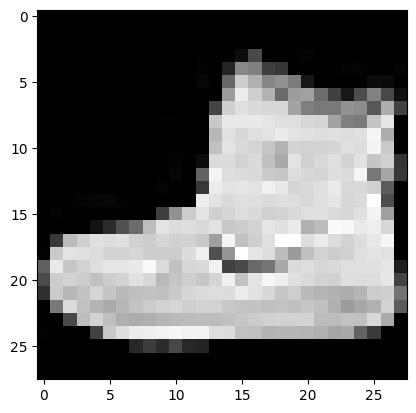

In [38]:
plt.imshow(image.squeeze(), cmap='gray')

In [39]:
rand_image_tensor =  torch.rand(size=(1,28,28))
rand_image_tensor

tensor([[[0.1864, 0.7294, 0.5354, 0.4200, 0.1441, 0.4637, 0.7894, 0.2557,
          0.7303, 0.0086, 0.3108, 0.3427, 0.0601, 0.6787, 0.1085, 0.7894,
          0.6024, 0.5066, 0.2334, 0.3298, 0.6214, 0.9807, 0.2605, 0.1598,
          0.2782, 0.1408, 0.4342, 0.1436],
         [0.8625, 0.8549, 0.1819, 0.9410, 0.6037, 0.1819, 0.6661, 0.0462,
          0.2341, 0.1391, 0.2219, 0.3918, 0.6139, 0.5954, 0.0113, 0.0214,
          0.4241, 0.9267, 0.6852, 0.9463, 0.2631, 0.6394, 0.0647, 0.7602,
          0.4877, 0.4621, 0.2300, 0.0631],
         [0.3159, 0.4528, 0.2345, 0.7090, 0.4132, 0.5492, 0.0344, 0.6408,
          0.2555, 0.1222, 0.2993, 0.0453, 0.1184, 0.8728, 0.9093, 0.1527,
          0.6084, 0.2425, 0.9679, 0.8052, 0.6988, 0.0923, 0.2541, 0.3949,
          0.0530, 0.2078, 0.6316, 0.0930],
         [0.6330, 0.4886, 0.4588, 0.3539, 0.2313, 0.0325, 0.1598, 0.8776,
          0.4629, 0.9869, 0.5264, 0.4411, 0.7998, 0.0293, 0.1901, 0.7868,
          0.3696, 0.8956, 0.4543, 0.8566, 0.5243, 0.5519,

In [40]:
# Pass image through model
#model_2(rand_image_tensor.unsqueeze(0))

### 7.3 Setup loss function and optimizer


In [41]:
# Setup loss func, eval metrics, and optimizer
from helper_functions import accuracy_fn

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()


In [42]:
# Import TQDM for progress bar
from tqdm.auto import tqdm

# Set Seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs (we'll keep this small for faster training time)
EPOCHS = 3

# Create training and test loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        # 1. forward pass
        y_pred = model_2(X)
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss

        # Optimize zero grade
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_2.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_2(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per back
        test_acc = test_acc / len(test_dataloader)

    print(f"\nTrain loss {train_loss:.4f} | Test loss {test_loss:.4f} | Test accuracy {test_acc:.4f}")

# Calculate training time
train_time_end = timer()
total_time_model_2 = print_train_time(train_time_start, train_time_end, device=str(next(model_2.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.5972 | Test loss 0.3927 | Test accuracy 86.0723
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.3610 | Test loss 0.3549 | Test accuracy 86.8810
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss 0.3242 | Test loss 0.3257 | Test accuracy 88.1190
Training took on cpu: 99.47 seconds


In [43]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

## 8. Comparing model results aand training time

In [44]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results,
])
compare_results

,model_name,loss,accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.674611,75.638978
2,FashionMNISTModelV2,0.325742,88.119010


In [45]:
# Add training time to results comparison
compare_results["Training time"] = [total_time_model_0,
                                    total_time_model_1,
                                    total_time_model_2]
compare_results

,model_name,loss,accuracy,Training time
0,FashionMNISTModelV0,0.476639,83.426518,7.998640
1,FashionMNISTModelV1,0.674611,75.638978,7.859933
2,FashionMNISTModelV2,0.325742,88.119010,99.466239


In [46]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device):
    pred_probs = []
    model.to('cpu')
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Preapre the sample and aadd batch dimension
            sample = torch.unsqueeze(sample, dim=0)

            # Forward pass (model output raw logits
            pred_logit = model(sample)

            # Get prediction probabilities (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)



In [47]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Sandal')

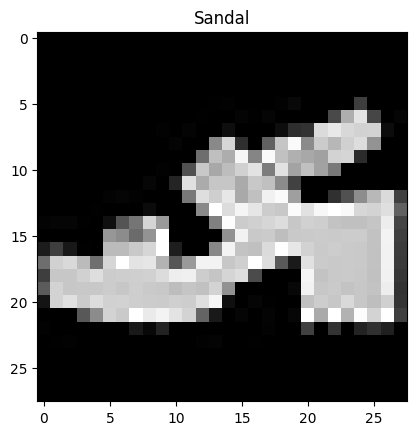

In [48]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])



In [53]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device='cpu')
pred_probs[:2]

tensor([[2.6569e-08, 6.5058e-09, 8.9548e-09, 1.1617e-08, 2.5133e-09, 9.9997e-01,
         9.8833e-09, 6.5410e-07, 9.2149e-06, 2.1993e-05],
        [2.2976e-02, 7.7505e-01, 6.2118e-04, 5.4779e-02, 7.6720e-02, 1.2489e-04,
         6.9608e-02, 2.5421e-05, 3.1599e-05, 6.7228e-05]])

In [54]:
# Convert prediction probabilties to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

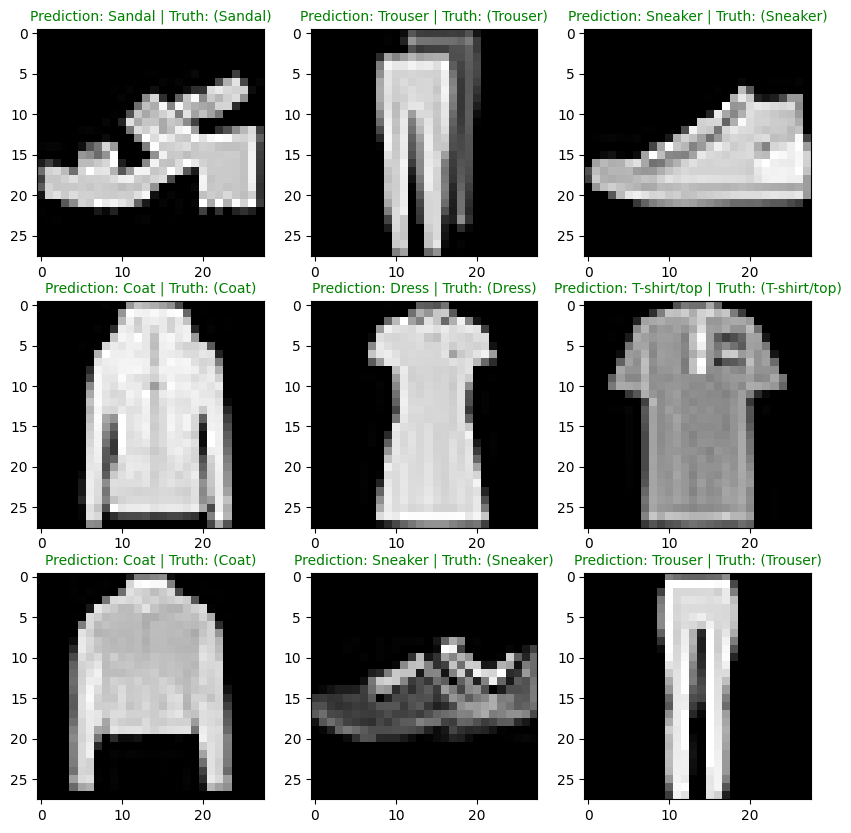

In [58]:
# Plot predictions
plt.figure(figsize=(10, 10))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    # Create subplots
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction in text form
    pred_label = class_names[pred_classes[i]]
    # Get truth label in text form
    truth_label = class_names[test_labels[i]]

    # Create title
    title_text = f"Prediction: {pred_label} | Truth: ({truth_label})"

    # Check for equality between pred and truth and change color of text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # Green if right, red if wrong
    else:
        plt.title(title_text, fontsize=10, c='r')


## 10. Making a confusion matrix
Good way of visualizing models
1. Make prediction with our trained model on the test data sets

In [61]:
import mlxtend

In [62]:
mlxtend.__version__

'0.23.4'

In [65]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device='cpu'), y.to(device='cpu')
        # Do forward pass
        y_logits = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Put on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]



Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 3, 2, 2, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 3, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 4, 7, 8, 7, 6, 2, 6, 2, 3, 1, 2, 8, 4, 4, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 4, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([5, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 0, 8, 1, 0, 9, 3, 6,
        7, 8, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        2, 4, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [66]:
len(y_pred_tensor)

10000

In [69]:
import torchmetrics
torchmetrics.__version__

'1.7.4'

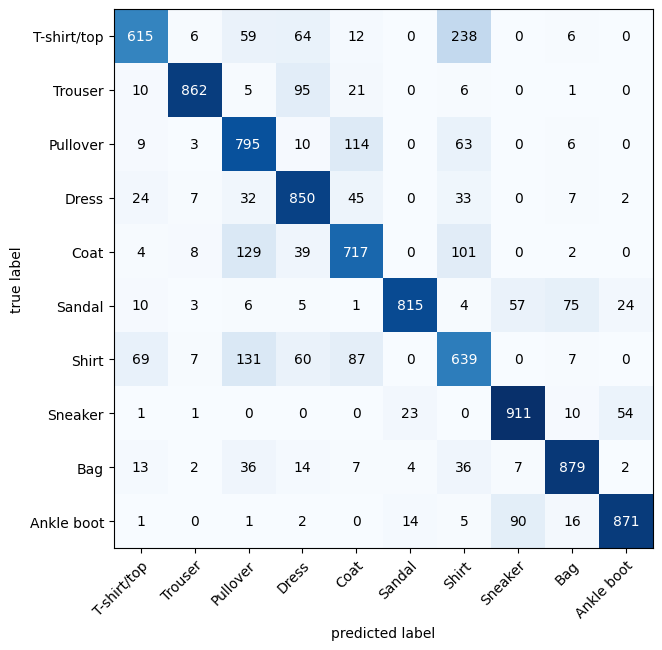

In [75]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(y_pred_tensor, test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7),
)

## 11. Save and load best performing model

In [79]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving file to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving file to: models/03_pytorch_computer_vision_model_2.pth


In [80]:
# Create new instance
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [81]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.32574188709259033,
 'accuracy': 88.11900958466454}

In [82]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
                                    model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.32574188709259033,
 'accuracy': 88.11900958466454}

In [84]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)


KeyError: 'model_loss'